In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_dir = "D:\\Mayuresh\\ThesisDataset\\GlobalSigns\\Dataset\\TrainingDataset"
validation_dir = "D:\\Mayuresh\\ThesisDataset\\GlobalSigns\\Dataset\\ValidationDataset"
# test_dir = "D:\\Mayuresh\hsrsnao\\ThesisDataset\\test"

In [3]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
NUM_CLASSES = 3

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.3,
                                   zoom_range=0.2,
                                   rotation_range=45,
                                   fill_mode='nearest',
                                   horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                    batch_size = BATCH_SIZE,
                                                    class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                        batch_size = BATCH_SIZE,
                                                        class_mode = 'categorical')

# test_generator = test_datagen.flow_from_directory(test_dir,
#                                                   target_size=(IMG_HEIGHT, IMG_WIDTH),
#                                                   batch_size=BATCH_SIZE,
#                                                   class_mode='categorical')

Found 6930 images belonging to 3 classes.
Found 2970 images belonging to 3 classes.


In [5]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(30,30))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

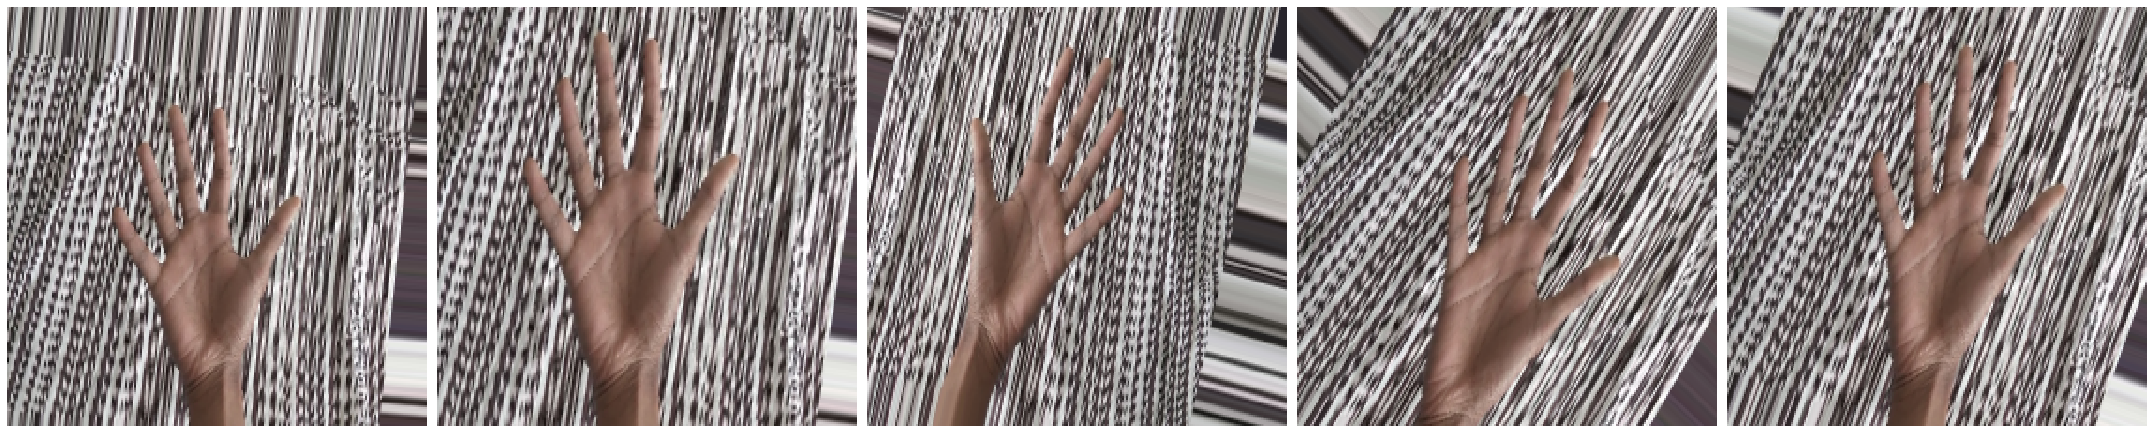

In [6]:
augmented_images = [train_generator[0][0][1] for i in range(5)]
plotImages(augmented_images)

In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 224, 224, 3)
labels batch shape: (32, 3)


In [8]:
## Unfreezing last layer of VGG16

MODEL_NAME = 'HSRS_AprilDataset_16June_1500_TF'
os.mkdir('D:\\Mayuresh\\hsrsnao\\Models\\'+MODEL_NAME)

In [9]:
from tensorflow.keras.applications import VGG19

conv_base = VGG19(weights='imagenet',
include_top=False,
input_shape=(224, 224, 3))

model = Sequential([
    conv_base,
    Dropout(0.25),
    
    Flatten(),
    Dropout(0.25),
    
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

In [10]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 36
This is the number of trainable weights after freezing the conv base: 4


#### Configuring training parameters

In [11]:
#### Configuring training parameters
from tensorflow.keras import optimizers
# opt = optimizers.Adadelta(lr=1.0, rho=0.95)
opt = optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 23,236,163
Trainable params: 3,211,779
Non-trainable params: 20,024,384
____________________________________

In [12]:
TRAIN_TOTAL = sum([len(files) for root, dirs, files in os.walk(train_dir)])
VALIDATION_TOTAL = sum([len(files) for root, dirs, files in os.walk(validation_dir)])
# TEST_TOTAL = sum([len(files) for root, dirs, files in os.walk(test_dir)])

EPOCHS = 30
STEPS_PER_EPOCH = TRAIN_TOTAL // BATCH_SIZE
VALIDATION_STEPS = VALIDATION_TOTAL // BATCH_SIZE

In [13]:
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor = 'accuracy',
                                     min_delta = 0.0001,
                                     patience = 3),
    tf.keras.callbacks.ModelCheckpoint(filepath = 'D:\\Mayuresh\\hsrsnao\\Models\\'+MODEL_NAME+'\\History_'+MODEL_NAME+'.h5',
                                       monitor= 'val_loss',
                                       save_best_only = True)
]

In [14]:
import datetime
starttime = datetime.datetime.now()

history = model.fit(x = train_generator,
                    validation_data = validation_generator,
                    shuffle = True,
                    steps_per_epoch = STEPS_PER_EPOCH,
                    epochs = EPOCHS,
                    initial_epoch = 0,
                    validation_steps  = VALIDATION_STEPS,
                    validation_freq = 1,
                    callbacks = callbacks_list,
                    verbose = 1)

endtime = datetime.datetime.now()
diff = endtime - starttime

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 216 steps, validate for 92 steps
Epoch 1/30
216/216 [==============================] - 162s 752ms/step - loss: 0.7630 - accuracy: 0.7095 - val_loss: 0.2348 - val_accuracy: 0.9433
Epoch 2/30
216/216 [==============================] - 159s 734ms/step - loss: 0.3052 - accuracy: 0.8826 - val_loss: 0.1239 - val_accuracy: 0.9721
Epoch 3/30
216/216 [==============================] - 156s 722ms/step - loss: 0.2359 - accuracy: 0.9108 - val_loss: 0.0868 - val_accuracy: 0.9803
Epoch 4/30
216/216 [==============================] - 156s 721ms/step - loss: 0.2077 - accuracy: 0.9200 - val_loss: 0.0596 - val_accuracy: 0.9881
Epoch 5/30
216/216 [==============================] - 156s 722ms/step - loss: 0.2036 - accuracy: 0.9236 - val_loss: 0.0669 - val_accuracy: 0.9762
Epoch 6/30
216/216 [==============================] - 159s 738ms/step - loss: 0.1910 - accuracy: 0.9246 - val_loss: 0.0589 - val_accuracy: 0.9793
Epoch 7/30
216/216 [===========

#### Saving Model History

In [16]:
#### Saving Model History
import pickle

# save:
f = open('D:\\Mayuresh\\hsrsnao\\Models\\'+MODEL_NAME+'\\History_'+MODEL_NAME+'.pckl', 'wb')
pickle.dump(history.history, f)
f.close()

# retrieve:    
f = open('D:\\Mayuresh\\hsrsnao\\Models\\'+MODEL_NAME+'\\History_'+MODEL_NAME+'.pckl', 'rb')
saved_history = pickle.load(f)
f.close()
if (history.history == saved_history):
    print('``` History is saved successfully for '+ MODEL_NAME + ' ```')
else:
    print(' Could not save model history ')

``` History is saved successfully for HSRS_AprilDataset_16June_1500_TF ```


#### Plotting Model Accuracy and Loss

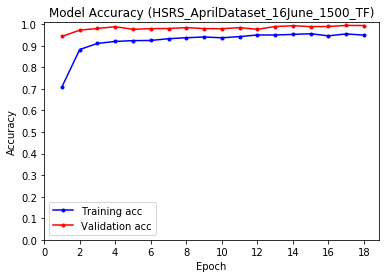

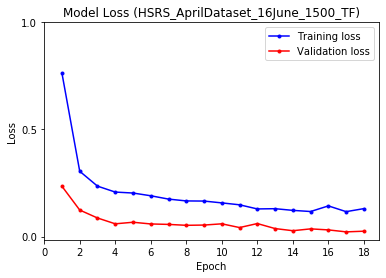

In [17]:
#### Plotting Model Accuracy and Lossimport matplotlib.pyplot as plt
import matplotlib.ticker as ticker

acc = saved_history['accuracy']
val_acc = saved_history['val_accuracy']
loss = saved_history['loss']
val_loss = saved_history['val_loss']
val_loss
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-b.', label='Training acc')
plt.plot(epochs, val_acc, '-r.', label='Validation acc')
plt.xticks(np.arange(0, len(val_acc)+1, 2))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.title('Model Accuracy ('+MODEL_NAME+')')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
plt.plot(epochs, loss, '-b.', label='Training loss')
plt.plot(epochs, val_loss, '-r.', label='Validation loss')
plt.xticks(np.arange(0, len(val_loss)+1, 2))
plt.yticks(np.arange(int(max(val_loss)+1), -0.5, -0.5))
plt.title('Model Loss ('+MODEL_NAME+')')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# plt1.savefig('D:\\Mayuresh\\OneDrive - UiT Office 365\\Model summaries\\HSRS_ThesisDataset_5Mar_1330.png', dpi=500)
plt.show()

In [18]:
train_acc = np.asarray(history.history['accuracy']).mean()
validation_acc = np.asarray(history.history['val_accuracy']).mean()

# test_generator = test_datagen.flow_from_directory(test_dir,
#                                                   target_size=(150, 150),
#                                                   batch_size=BATCH_SIZE,
#                                                   class_mode='categorical')
# test_loss, test_acc = model.evaluate_generator(test_generator, steps=TEST_TOTAL//BATCH_SIZE)

In [19]:
print('### VGG TF CNN ###')
print('Model Name: ', MODEL_NAME)
print('Model Training Time: ', diff.seconds/60)
print('Train acc:', train_acc * 100)
print('Val acc:', validation_acc * 100)
# print('test acc:', test_acc)

### VGG TF CNN ###
Model Name:  HSRS_AprilDataset_16June_1500_TF
Model Training Time:  48.016666666666666
Train acc: 92.32869744300842
Val acc: 98.16954135894775
